In [2]:
import control
import numpy as np
import matplotlib.pyplot as plt

# Constants
r   = 0.226
d   = 0.065
g   = 9.81
R   = 0.324
j_1 = 0.0633
j_2 = 0.007428
m_1 = 3.294
m_2 = 1.795
k_e = 0.00638
k_t = 0.00852
T_v = 0.140

H_motorSpeedToRobotVelocity(s) =  
 -0.01333 s^2 - 8.35
---------------------
s^2 + 0.5107 s + 8.35

poles =  [-0.25534039+2.87837251j -0.25534039-2.87837251j]
zeros =  [0.+25.02550406j 0.-25.02550406j]



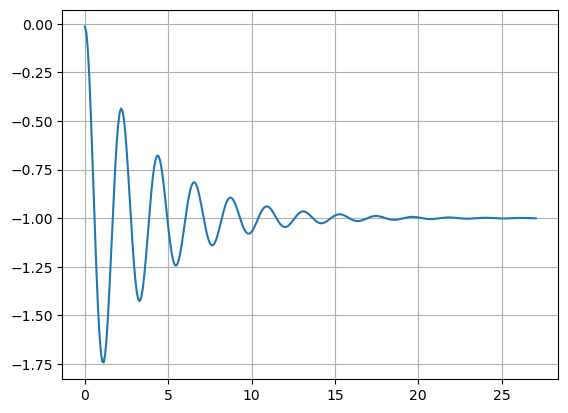

In [3]:
# Motor speed to Robot Angular Velocity
A = -2*j_2 - 2*d*d*m_2 + d*r*m_2
B = -2*g*d*m_2
C = j_1 + 2*j_2 + r*r*m_1 + (2*d*d-3*d*r+r*r)*m_2
D = T_v
E = 2*g*d*m_2

num1 = np.multiply([A, 0, B], 1/C)
den1 = np.multiply([C, D, E], 1/C)

H_motorSpeedToRobotVelocity = control.tf(num1, den1)
print('H_motorSpeedToRobotVelocity(s) = ', H_motorSpeedToRobotVelocity)
(p1, z1) = control.pzmap(H_motorSpeedToRobotVelocity, False)
print('poles = ', p1)
print('zeros = ', z1, end='\n\n')

t1, f1 = control.step_response(H_motorSpeedToRobotVelocity)
plt.plot(t1, f1)
plt.grid()

H_voltageToRobotVelocity(s) =  
       -0.02312 s^2 - 14.48
----------------------------------
s^3 + 0.4945 s^2 + 88.99 s + 38.46

poles =  [-0.03113152+9.43210228j -0.03113152-9.43210228j -0.43225385+0.j        ]
zeros =  [0.+25.02550406j 0.-25.02550406j]



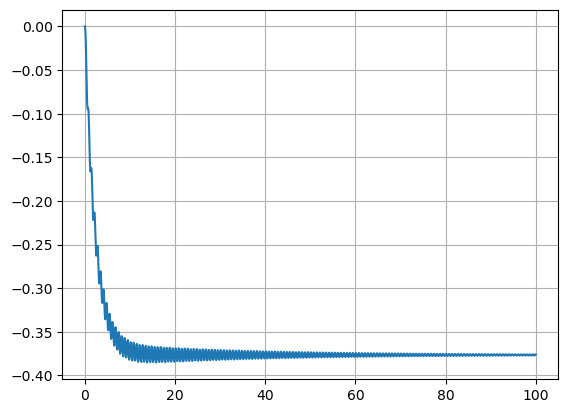

In [4]:
# Voltage to Robot Angular Velocity
A = -2*d*g*k_t*m_2
B = k_t*(-2*j_2 + d*(-2*d+r)*m_2)
C = -d*g*R*T_v*m_2 + 2*d*g*k_e*k_t*m_2
D = -T_v*k_e*k_t + d*g*R*j_1*m_2 + d*g*r*r*R*m_1*m_2 + d*g*r*r*R*m_2*m_2
E = -R*T_v*j_2 + 2*j_2*k_e*k_t - d*d*R*T_v*m_2 + k_e*k_t*(j_1 + r*r*m_1 
        + (2*d*d - 3*d*r + r*r  )*m_2)
F = d*d*R*j_1*m_2 + d*d*r*r*R*m_1*m_2 + R*j_2*(j_1 + r*r*(m_1 + m_2))

num2 = np.multiply([B, 0, A], 1/F)
den2 = np.multiply([F, -E, D, -C], 1/F)

H_voltageToRobotVelocity = control.tf(num2, den2)
print('H_voltageToRobotVelocity(s) = ', H_voltageToRobotVelocity)
(p2, z2) = control.pzmap(H_voltageToRobotVelocity, False)
print('poles = ', p2)
print('zeros = ', z2, end='\n\n')

t2, f2 = control.step_response(H_voltageToRobotVelocity, np.linspace(0, 100, 1000))
plt.plot(t2, f2)
plt.grid()

H_voltageToPendulumVelocity(s) =  
   1.734 s^2 + 0.8856 s + 14.48
----------------------------------
s^3 + 0.4945 s^2 + 88.99 s + 38.46

poles =  [-0.03113152+9.43210228j -0.03113152-9.43210228j -0.43225385+0.j        ]
zeros =  [-0.25534039+2.87837251j -0.25534039-2.87837251j]



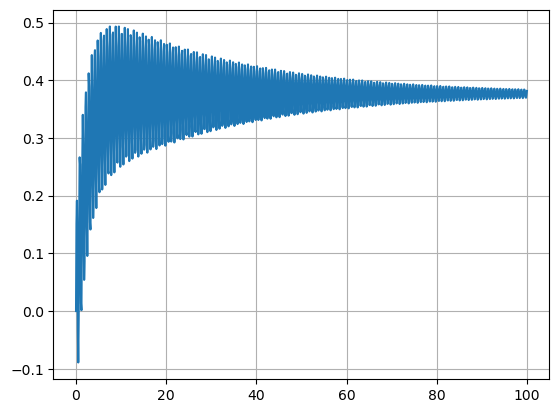

In [5]:
# Voltage to Pendulum Angular Velocity
A = -d*g*R*T_v*m_2 + 2*d*g*k_e*k_t*m_2
B = -T_v*k_e*k_t + d*g*R*j_1*m_2 + d*g*r*r*R*m_1*m_2 + d*g*r*r*R*m_2*m_2
C = -R*T_v*j_2 - d*d*R*T_v*m_2 + k_e*k_t*(j_1 + 2*j_2 + r*r*m_1 + 
        (2*d*d - 3*d*r + r*r)*m_2)
D = R*j_1*j_2 + d*d*R*j_1*m_2 + d*d*r*r*R*m_1*m_2 + r*r*R*j_2*(m_1 + m_2)
E = k_t*(j_1 + 2*j_2 + r*r*m_1 + (2*d*d - 3*d*r + r*r)*m_2)
F = -k_t*T_v
G = 2*d*g*m_2*k_t

num3 = np.multiply([E, -F, G], 1/D)
den3 = np.multiply([D, -C, B, -A], 1/D)

H_voltageToPendulumVelocity = control.tf(num3, den3)
print('H_voltageToPendulumVelocity(s) = ', H_voltageToPendulumVelocity)
(p3, z3) = control.pzmap(H_voltageToPendulumVelocity, False)
print('poles = ', p3)
print('zeros = ', z3, end='\n\n')

# t3, f3 = control.step_response(control.series(H_voltageToPendulumVelocity, control.tf([1], [1, 0])), np.linspace(0, 100, 1000))
t3, f3 = control.step_response(H_voltageToPendulumVelocity, np.linspace(0, 100, 1000))
plt.plot(t3, f3)
plt.grid()

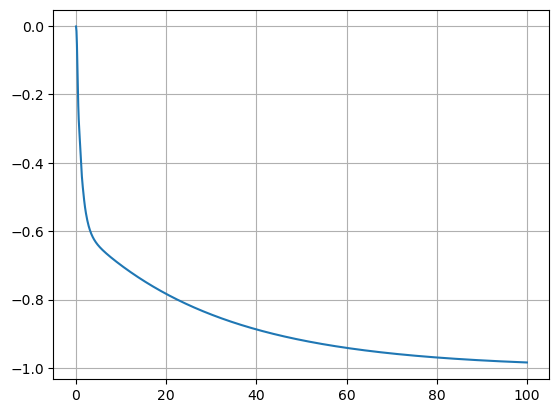

In [6]:
# PID controller for The Angular Velocity of the Robot
K_p = 3.66
K_i = 0.2
K_d = 0.05
C = control.tf([K_d, K_p, K_i], [1, 0])
W = control.series(control.feedback(control.series(C, H_voltageToPendulumVelocity), 1),
                        H_motorSpeedToRobotVelocity)

#W = control.tf(control.series(H_voltageToPendulum, H_speedToRotation))
t4, f4 = control.step_response(W, np.linspace(0, 100, 1000))
plt.plot(t4, f4)

# Testing
W = control.feedback(control.series(C, H_voltageToPendulumVelocity), 1)
tt, ff = control.step_response(W, np.linspace(0, 100, 1000))
#plt.plot(tt, ff)

plt.grid()

5 states have been removed from the model

         1.711 s + 0.8856
----------------------------------
s^3 + 0.4945 s^2 + 88.99 s + 38.46



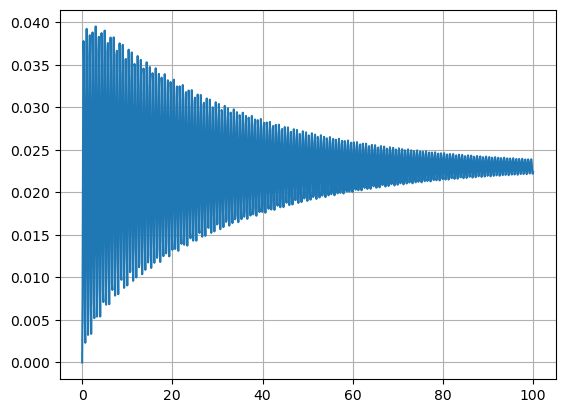

In [10]:
H_voltageToPendulumAngle = control.series(H_voltageToPendulumVelocity, control.tf([1], [1, 0]))
H_voltageToRobotAngle = control.series(H_voltageToRobotVelocity, control.tf([1], [1, 0]))
# print(H_voltageToPendulumAngle)
# print(H_voltageToRobotAngle)

H_voltageToInclinationAngle = control.minreal(control.parallel(H_voltageToPendulumAngle, H_voltageToRobotAngle))
t3, f3 = control.step_response(H_voltageToInclinationAngle, np.linspace(0, 100, 1000))
print(H_voltageToInclinationAngle)
plt.plot(t3, f3)
plt.grid()

In [8]:
# Discretization of H_voltageToInclinationAngle
H_voltageToInclinationAngleDiscrete = control.sample_system(H_voltageToInclinationAngle, 1/200, method='zoh')
sys_ss_inclination = control.tf2ss(H_voltageToInclinationAngleDiscrete)
print(H_voltageToInclinationAngleDiscrete)
print(sys_ss_inclination)
t, f = control.step_response(sys_ss_inclination)
# plt.plot(t, f)
# plt.show()


# Discretization of H_voltageToRobotAnlge
H_voltageToRobotAngleDiscrete = control.sample_system(H_voltageToRobotAngle, 1/200, method='zoh')
sys_ss_robot = control.tf2ss(H_voltageToRobotAngleDiscrete)
print(H_voltageToRobotAngleDiscrete)
print(sys_ss_robot)
t, f = control.step_response(sys_ss_robot)
# plt.plot(t, f)
# plt.show()


2.139e-05 z^2 + 5.609e-08 z - 2.133e-05
---------------------------------------
  z^3 - 2.995 z^2 + 2.993 z - 0.9975

dt = 0.005

A = [[ 2.99530642e+00  2.99284169e+00 -9.97530470e-01]
     [-1.00000000e+00 -5.54881455e-16 -1.59800462e-17]
     [ 0.00000000e+00  1.00000000e+00  2.22044605e-16]]

B = [[-1.]
     [ 0.]
     [ 0.]]

C = [[-2.13854167e-05  5.60934437e-08 -2.13309641e-05]]

D = [[0.]]

dt = 0.005


-2.891e-07 z^3 + 2.848e-07 z^2 + 2.841e-07 z - 2.889e-07
--------------------------------------------------------
     z^4 - 3.995 z^3 + 5.988 z^2 - 3.99 z + 0.9975

dt = 0.005

A = [[ 3.99530642e+00  5.98814811e-01  3.99037216e-01  9.97530470e-02]
     [-1.00000000e+01 -3.14228090e-16 -5.77490988e-16 -7.06501654e-16]
     [ 0.00000000e+00 -1.00000000e+00  1.37185165e-16  9.44119789e-17]
     [ 0.00000000e+00  0.00000000e+00 -1.00000000e+00  3.33066907e-16]]

B = [[0.1]
     [0. ]
     [0. ]
     [0. ]]

C = [[-2.89115741e-06 -2.84833401e-07  2.84121882e-07  2.88877327e-07]]

D 

A = [[ 3.99530642e+00 -5.98814811e-01 -3.99037216e-01  9.97530470e-02]
     [ 1.00000000e+01 -2.88239263e-16  6.53935931e-16 -3.65125867e-16]
     [ 0.00000000e+00 -1.00000000e+00  8.22231960e-16  4.73000078e-16]
     [ 0.00000000e+00  0.00000000e+00  1.00000000e+00 -3.33066907e-16]]

B = [[0.1]
     [0. ]
     [0. ]
     [0. ]]

C = [[ 2.13854167e-04 -2.13293233e-05  2.13870576e-05 -2.13309641e-05]
     [ 2.13854167e-04 -2.13293233e-05  2.13870576e-05 -2.13309641e-05]
     [-2.89115741e-06  2.84833401e-07 -2.84121882e-07  2.88877327e-07]]

D = [[0.]
     [0.]
     [0.]]

dt = 0.005



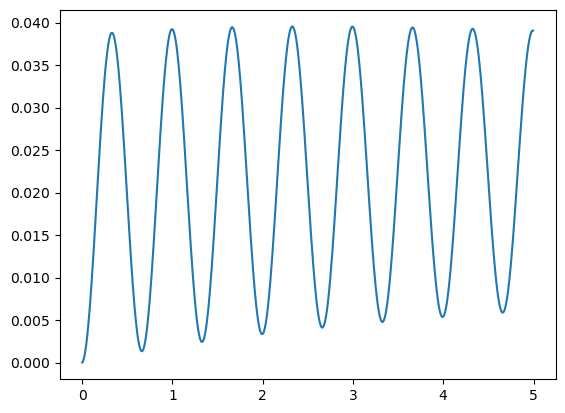

In [9]:
# Matrix solution of discretization
# print(H_voltageToInclinationAngleDiscrete.num)
H_matrix = control.tf([H_voltageToInclinationAngleDiscrete.num[0],
                       H_voltageToInclinationAngleDiscrete.num[0],
                       H_voltageToRobotAngleDiscrete.num[0]],
                      [H_voltageToInclinationAngleDiscrete.den[0],
                       H_voltageToInclinationAngleDiscrete.den[0],
                       H_voltageToRobotAngleDiscrete.den[0]],
                      1/200)
sys_ss_matrix = control.tf2ss(H_matrix)
print(sys_ss_matrix)
x1_matrix = np.zeros([4,1])
t_matrix = np.arange(1000)*0.005
f_matrix = []
for i in range(1000):
    variance_accel = 0.002
    variance_gyro = 0.002
    variance_encoder = 0.01
    w = np.array([np.random.normal(0, variance_accel), 
                  np.random.normal(0, variance_gyro), 
                  np.random.normal(0, variance_encoder)]).reshape([3,1])
    x = sys_ss_matrix.A.dot(x1_matrix) + sys_ss_matrix.B
    y = sys_ss_matrix.C.dot(x) #+ w
    x1_matrix = x
    f_matrix.append(y)
f_matrix = np.array(f_matrix)
plt.plot(t_matrix, f_matrix[:,0,0])
plt.show()